# Assignment - 4
By Swasthik Vellingiri Kowsalya

### Question: 8 

#### 8 - (a)

In [6]:
library(ISLR)
attach(Carseats)

In [7]:
#splitting train and test

set.seed(1)
split1 <- sample(c(rep(0, 0.7 * nrow(Carseats)), rep(1, 0.3 * nrow(Carseats))))
train1 <- Carseats[split1 == 0, ]
test1 <- Carseats[split1 == 1, ]

### 8 - (b)

In [9]:
# tree regression model

library(tree)

tree_model = tree(Sales ~., train1)
summary(tree_model)


Regression tree:
tree(formula = Sales ~ ., data = train1)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Advertising" "CompPrice"   "Income"     
[6] "Age"        
Number of terminal nodes:  17 
Residual mean deviance:  2.31 = 607.6 / 263 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.52900 -1.02000 -0.09054  0.00000  0.87690  4.39600 

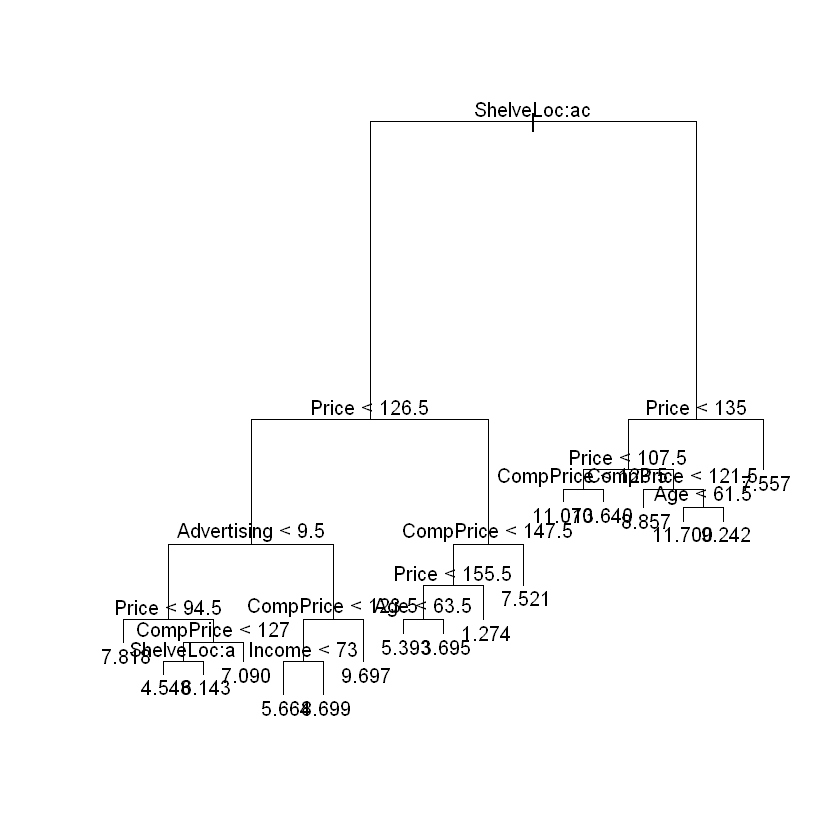

In [10]:
plot(tree_model)
text(tree_model)

In [11]:
mod_pred = predict(tree_model,newdata=test1)
mod_mse = mean((test1$Sales - mod_pred)^2)
mod_mse

[1] 5.207429

#### The MSE of the tree is 5.207

### 8 - (c)

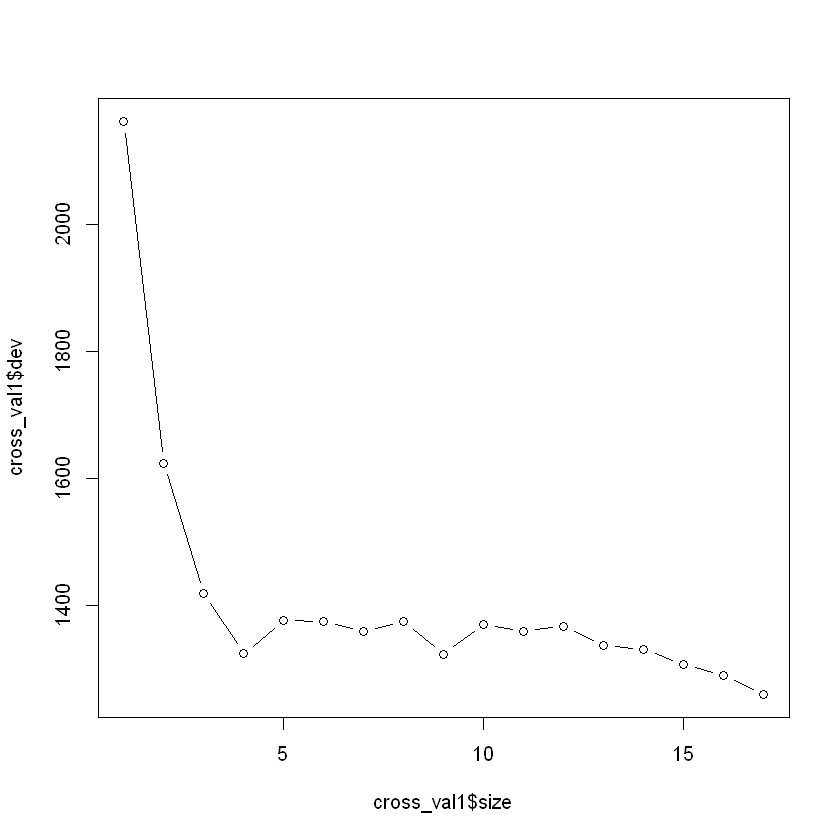

In [12]:
# Cross Validation

set.seed(12)
cross_val1 = cv.tree(tree_model)
plot(cross_val1$size,cross_val1$dev,type = "b")

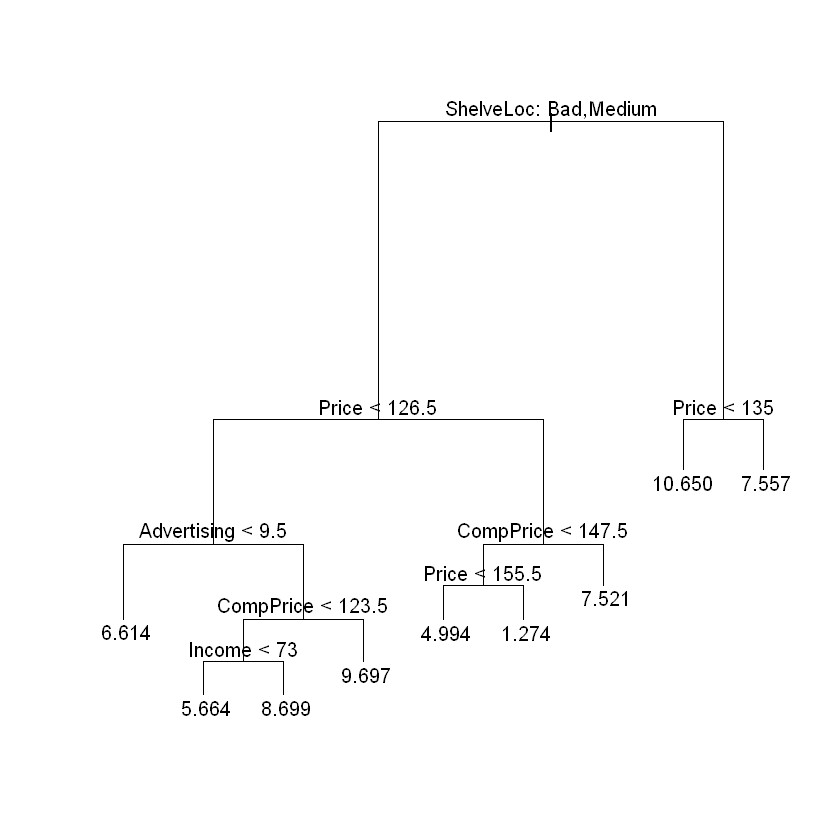

In [13]:
# prune tree

prune1 = prune.tree(tree_model,best=9)
plot(prune1)
text(prune1,pretty=0)

In [14]:
#predicting prune tree

prune_pred  = predict(prune1,test1)
mean((prune_pred-test1$Sales)^2)

[1] 6.550628

### For the pruned tree we get MSE as 6.55

### 8 - (d)

In [16]:
#bagging model

library(randomForest)
bag1 = randomForest(Sales~. ,train1, importance=TRUE, mtry=13)
importance(bag1)

Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"


,%IncMSE,IncNodePurity
CompPrice,33.9406587,255.781450
Income,13.6407831,135.107646
Advertising,24.1512697,200.288838
Population,3.2913434,82.270568
Price,63.7817457,564.015264
ShelveLoc,70.6950837,647.794481
Age,12.2666168,141.957213
Education,2.5162933,54.078818
Urban,0.4957908,10.580069
US,3.5402919,7.483325


In [17]:
bag_pred = predict(bag1,test1)
mean((bag_pred - test1$Sales)^2)

[1] 2.800343

#### The Test Set MSE obtained is 2.800. Bagging has reduced the MSE value

### 8 - (e)

In [19]:
#random forest model

rf1 = randomForest(Sales~. ,train1,importance=TRUE,mtry=sqrt(13))
importance(rf1)

,%IncMSE,IncNodePurity
CompPrice,18.7133912,216.11670
Income,8.2466683,165.44322
Advertising,18.7185635,226.91570
Population,2.3457093,119.06620
Price,45.3304047,469.33760
ShelveLoc,57.5113947,562.42470
Age,10.6185983,176.06877
Education,0.3562591,73.05377
Urban,-0.5919341,14.25797
US,4.7100161,25.67788


In [20]:
rf_pred = predict(rf1,test1)
mean((rf_pred - test1$Sales)^2)

[1] 3.169449

#### The MSE in ranfom forest is higher than the MSE of bagging even though the important features choosen are the same. 

### Question - 9 

#### 9 - (a)

In [22]:
#train test split 

attach(OJ)

train<-sample(1:nrow(OJ),800)
train_oj = OJ[train,]
test_oj = OJ[-train,]

The following objects are masked from OJ (pos = 3):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreID, WeekofPurchase




### 9 - (b)

In [23]:
# tree model

tree_oj = tree(Purchase ~. , train_oj)
summary(tree_oj)



Classification tree:
tree(formula = Purchase ~ ., data = train_oj)
Variables actually used in tree construction:
[1] "LoyalCH"       "StoreID"       "ListPriceDiff" "PriceDiff"    
Number of terminal nodes:  7 
Residual mean deviance:  0.7912 = 627.4 / 793 
Misclassification error rate: 0.1675 = 134 / 800 

#### The variables choosen are "loyalCH","StoreID","ListPriceDiff","PriceDiff"
#### Number of terminal Nodes: 7 
#### Misclassification error rate: 0.1675 = 16.75%

### 9 - (c)

In [24]:
tree_oj

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1067.00 CH ( 0.61375 0.38625 )  
   2) LoyalCH < 0.482304 304  337.40 MM ( 0.24342 0.75658 )  
     4) LoyalCH < 0.0356415 61   10.21 MM ( 0.01639 0.98361 ) *
     5) LoyalCH > 0.0356415 243  297.00 MM ( 0.30041 0.69959 )  
      10) StoreID < 3.5 163  174.60 MM ( 0.22699 0.77301 ) *
      11) StoreID > 3.5 80  110.10 MM ( 0.45000 0.55000 ) *
   3) LoyalCH > 0.482304 496  435.00 CH ( 0.84073 0.15927 )  
     6) LoyalCH < 0.764572 233  273.90 CH ( 0.72532 0.27468 )  
      12) ListPriceDiff < 0.235 96  133.00 CH ( 0.51042 0.48958 )  
        24) PriceDiff < 0.085 57   72.56 MM ( 0.33333 0.66667 ) *
        25) PriceDiff > 0.085 39   42.14 CH ( 0.76923 0.23077 ) *
      13) ListPriceDiff > 0.235 137  102.70 CH ( 0.87591 0.12409 ) *
     7) LoyalCH > 0.764572 263  115.10 CH ( 0.94297 0.05703 ) *

The selected node is 13 “ListPriceDiff”

The node splits for ListPriceDiff is greater than 0.235. There are 137 observation in the leaf with the residual deviance of 102.70. The overall prediction is CH with 87% of observations taking CH value and rest 13% taking MM

### 9 - (d)

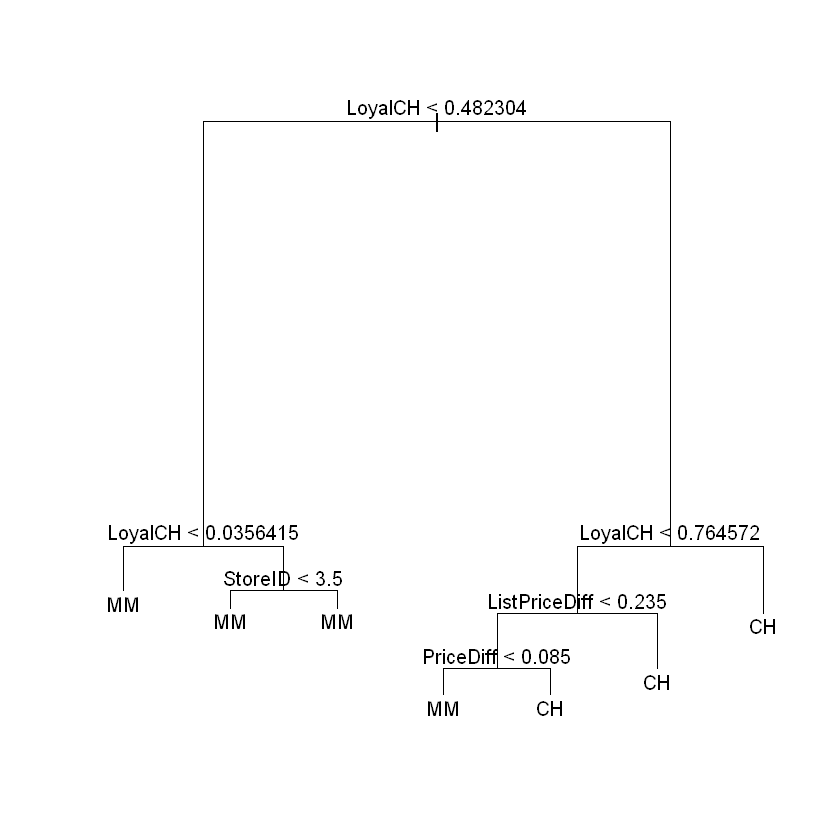

In [27]:
plot(tree_oj)
text(tree_oj,pretty=0)

##### The top nodes contain LoyalCH proving that it is the most important feature of this model. 

### 9 - (e)

In [28]:
# Predicting the test

oj_pred  = predict(tree_oj, newdata = test_oj, type = "class")

# confusion matrix
table(test_oj$Purchase,oj_pred,dnn = c("Actual","Predicted"))


      Predicted
Actual  CH  MM
    CH 135  27
    MM  17  91

In [30]:
# test error rate 

error_oj = (21+37)/nrow(test_oj)
round(error_oj,3)

[1] 0.215

#### The Test Error Rate for the Tree is 21.5 %

### 9 - (f)

In [31]:
# Apply the cv.tree()

cv_oj = cv.tree(tree_oj, FUN = prune.misclass)
cv_oj

$size
[1] 7 5 2 1

$dev
[1] 174 174 171 309

$k
[1]       -Inf   0.000000   6.333333 156.000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

### 9 - (g)

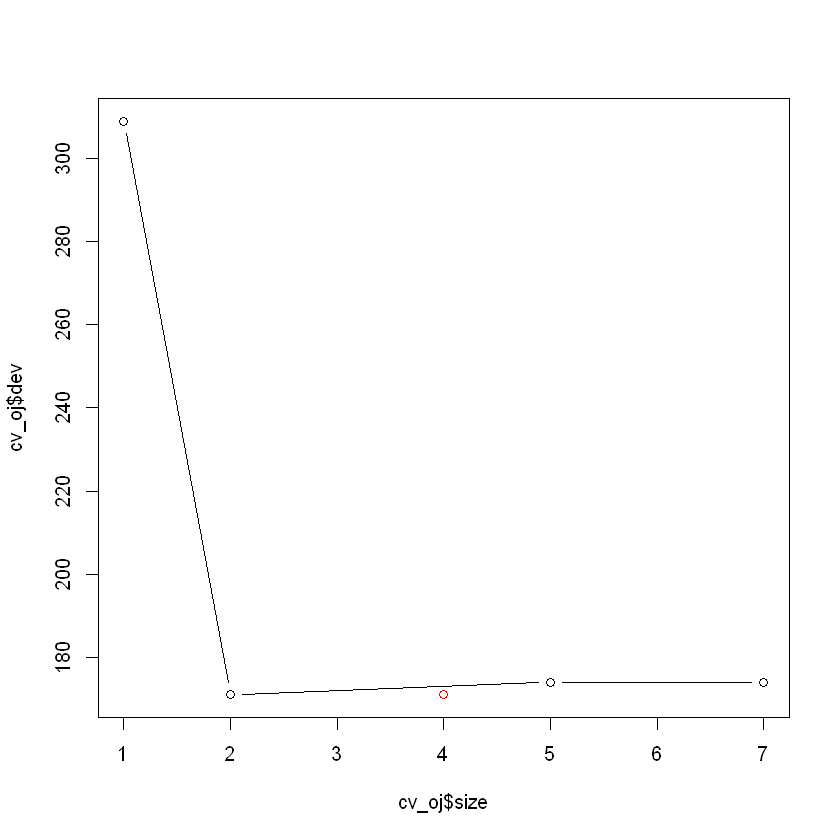

In [33]:
#Plotting cross validation and tree size

plot(cv_oj$size,cv_oj$dev,type = "b")
points(4,min(cv_oj$dev),col="red")

### 9 - (h)

#### tree size = 4 corresponds to the lowest cross-validated classification error rate

### 9 - (i)

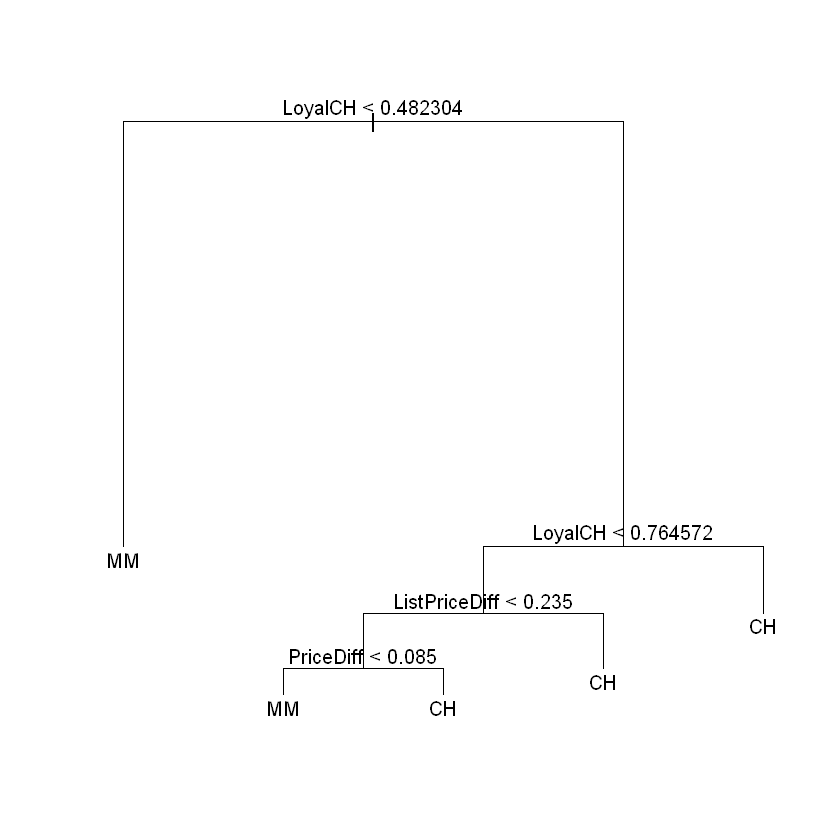

In [35]:
prune_oj  = prune.misclass(tree_oj,best=4)
plot(prune_oj)
text(prune_oj,pretty=0)

### 9 - (j)


In [38]:
prune_summary = summary(prune_oj)
prune_summary


Classification tree:
snip.tree(tree = tree_oj, nodes = 2L)
Variables actually used in tree construction:
[1] "LoyalCH"       "ListPriceDiff" "PriceDiff"    
Number of terminal nodes:  5 
Residual mean deviance:  0.8427 = 669.9 / 795 
Misclassification error rate: 0.1675 = 134 / 800 

Tree Misclassification error rate: 14.5 %
Pruned Tree Misclassification error rate: 16 %
#### from the result, we can see that the error rate did not reduce in pruned tree. 

### 9 - (k)


In [42]:
#Comparing pruned and unpruned

prune_pred_oj = predict(prune_oj,newdata = test_oj,type="class")
table(test_oj$Purchase,prune_pred_oj,dnn = c("Actual","Predicted"))

      Predicted
Actual  CH  MM
    CH 135  27
    MM  17  91

In [44]:
prune_error_oj = (27+17)/nrow(test_oj)
round(prune_error_oj,3)

[1] 0.163

The Test Error Rate for the full Tree is 21.5 %
The Test Error Rate for the pruned Tree is 16.3

#### The misclassification error in pruned tree si lesser than the full tree. 

### Question - 10
### 10 - (a)

In [46]:
# removing NA values and log transform

attach(Hitters)
Hitters = na.omit(Hitters)
Hitters$Salary<-log(Hitters$Salary)

The following objects are masked from Hitters (pos = 3):

    Assists, AtBat, CAtBat, CHits, CHmRun, CRBI, CRuns, CWalks,
    Division, Errors, Hits, HmRun, League, NewLeague, PutOuts, RBI,
    Runs, Salary, Walks, Years




### 10 - (b)

In [55]:
# Createing a training set consisting of the first 200 observations

subset = 1:200
train_hit = Hitters[subset,]
test_hit = Hitters[-subset,]

### 10 - (c)

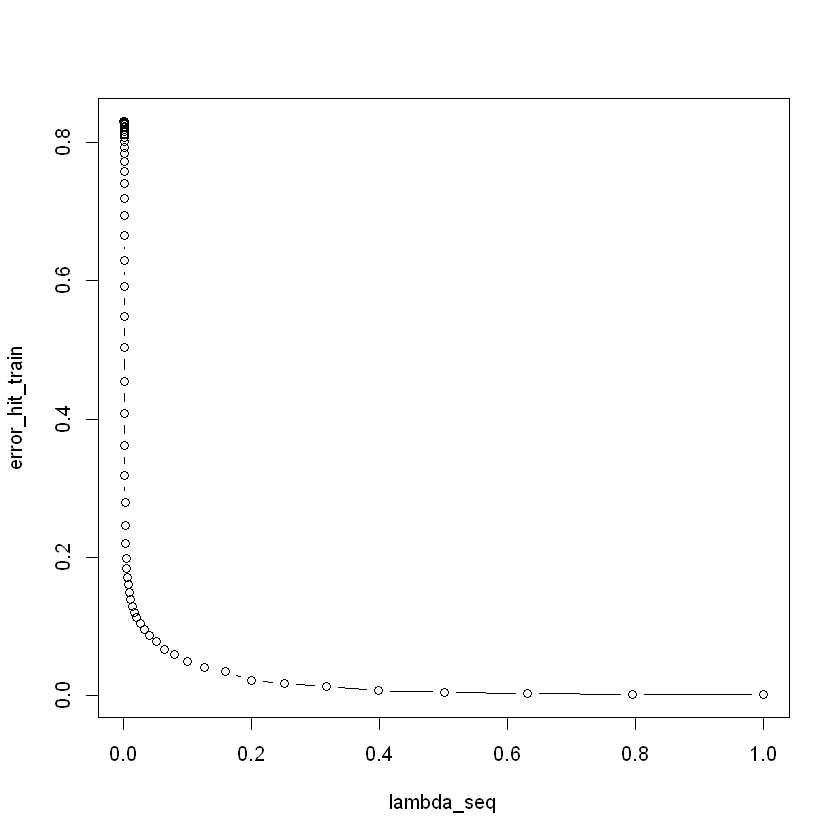

In [67]:
# Perform boosting on the training set with 1,000 trees

library(gbm)
set.seed(1)
lambda_seq = 10^seq(-6, 0, 0.1)

error_hit_train <- c()
for (i in 1:length(lambda_seq)) {
    gbm_hit = gbm(Salary~.,data = train_hit,distribution = "gaussian", n.trees = 1000,shrinkage = lambda_seq[i])
  
    pred_hit = predict(gbm_hit,train_hit,n.trees=1000)
    error_hit_train[i] = mean((pred_hit - train_hit$Salary)^2)
}


plot(lambda_seq,error_hit_train,type="b")

### 10 - (d)

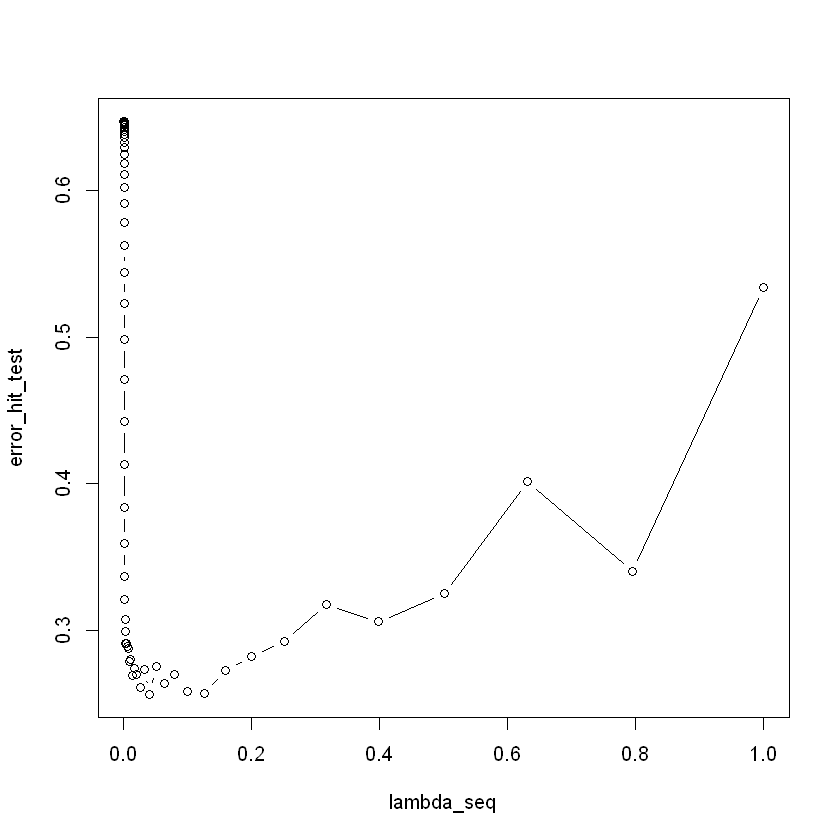

In [69]:
# Perform boosting on the testing set with 1,000 trees

library(gbm)
set.seed(1)
lambda_seq = 10^seq(-6, 0, 0.1)

error_hit_test <- c()
for (i in 1:length(lambda_seq)) {
    gbm_hit = gbm(Salary~.,data = train_hit,distribution = "gaussian", n.trees = 1000,shrinkage = lambda_seq[i])
  
    pred_hit = predict(gbm_hit,test_hit,n.trees=1000)
    error_hit_test[i] = mean((pred_hit - test_hit$Salary)^2)
}

plot(lambda_seq,error_hit_test,type="b")

In [71]:
gbm_testerror = min(error_hit_test)
gbm_testerror

[1] 0.2566392

#### The minimum test MSE obtained is 0.26

### 10 - (e)

In [73]:
#Fitting least square regression model

library(glmnet)

lm = lm(Salary~.,train_hit)
lm_pred_hit = predict(lm,test_hit)
lm_mse_test = mean((lm_pred_hit - test_hit$Salary)^2)
lm_mse_test

[1] 0.4917959

In [75]:
# Fitting the Lasso regression model

x = model.matrix(Salary~.,train_hit)
x_test = model.matrix(Salary ~ . , test_hit)
y = train_hit$Salary

lasso_hit = glmnet(x,y,alpha=1)
lasso_predict_hit = predict(lasso_hit,s=0.01,x_test)
lasso_mse_hit = mean((lasso_predict_hit-test_hit$Salary)^2)
lasso_mse_hit

[1] 0.4700537

The test MSE for least squares regression is 0.49
The test MSE for Lasso regression model is 0.47
The test MSE for Boosting mode is 0.26
#### From the results, we can confirm that boosting gives the least test values MSE 



### 10 - (f)

,var,rel.inf
,<chr>,<dbl>
CAtBat,CAtBat,21.6160965
CWalks,CWalks,10.8767978
CRuns,CRuns,8.5470098
CRBI,CRBI,7.2305103
Years,Years,6.7285619
PutOuts,PutOuts,6.2008381
CHmRun,CHmRun,5.7351091
Walks,Walks,5.3927544
CHits,CHits,4.9385964


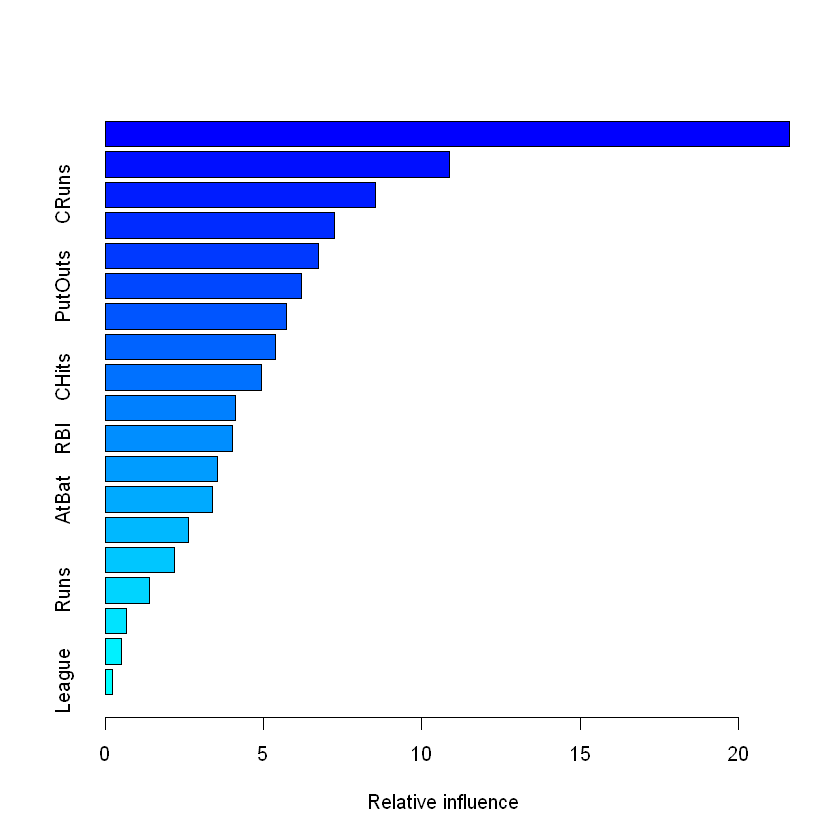

In [81]:
#Finding best predictors

gbm_hit  = gbm(Salary~.,train_hit,distribution = "gaussian",n.trees = 1000,shrinkage=lambda_seq[which.min(error_hit_test)])
summary(gbm_hit)

##### The top 3 predictors are CAtBat, Chits, Cwalks

### 10 - (g)

In [80]:
# Bagging method

set.seed(123)

bag_hit = randomForest(Salary~. ,train_hit,mtry=19,importance=TRUE)
bagg_pred = predict(bag_hit,test_hit)
bagg_mse_test = mean((bagg_pred-test_hit$Salary)^2)
bagg_mse_test

[1] 0.2297964

#### The test MSE for bagging is 0.22 which is lower than the MSE of Boosting which was 0.26.